<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-Means

In [1]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import random
import time
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
from IPython import display
from time import sleep

In [3]:
def plot_clusters(X, y, C0=None):
    plt.scatter(*X.T,c=y)
    if C0 is not None:
        plt.scatter(*C0.T, s=200, color='r',  marker='+' )
    plt.show()

In [4]:
def plot_clusters_history(X, y_history, C, plot_C=False):
    for yi, ci in zip(y_history, C):
        plt.scatter(*X.T,c=yi)
        if plot_C:
            plt.scatter(*ci.T, s=200, color='r',  marker='+' )
        display.display(plt.gcf())
        display.clear_output(wait=True)
        #display.display(plt.gcf())
        
        sleep(3.5)
    
    display.clear_output(wait=True)


In [5]:
class kmean:
    def __init__(self, X, k, max_iter, dc_min, eps):
        self.X = X
        self.k = k
        self.N = len(X)
        self.max_iter = max_iter
        self.dc_min = dc_min
        self.eps = eps
        self.y_pred = np.zeros(self.N)
        self.C0 = None
        self.y_history = []
        self.C_history = []
        self.err_history = []

    def _dist(self, x1, x2):
        return np.sqrt((x1 - x2)@(x1 - x2).T)

    def _get_centroids(self):
        indexes = np.arange(0, self.N - 1)
        while True:
            C = np.random.choice(indexes,self.k)
            Pc = self.X[C]
            dm = distance.cdist(Pc,Pc)
            if np.sum(dm <= self.dc_min)/2 == self.k/2:
                break
        self.C0 = Pc.copy()

    def predict(self):
        n_iter = 0
        # get initial centroid 
        self._get_centroids()
        self.C_history.append(self.C0)
        self.err_history.append(1000)
        self.y_history.append(self.y_pred)
        y_i = np.zeros(self.N)

        while n_iter < self.max_iter:
            print('[INFO]: Iter', (n_iter+1), '/', self.max_iter)
            for i, Pi in enumerate(self.X):
                # distance between each centroid and each point Pi
                c_dist = np.array([ self._dist(Ci, Pi) for Ci in self.C0])

                # index of the cluster with min distance
                cmin_idx = np.argmin(c_dist) 

                # class assignation
                y_i[i] = cmin_idx

            # mean value for each Pint of the class Ci
            Cmean = np.array([np.mean(self.X[y_i == c], axis=0) for c in range(self.k)])

            # centroids error
            c_dist_err = np.array([ self._dist(Ci, Cm) for Ci, Cm in zip(self.C0, Cmean)])
            error = np.sum(c_dist_err)
            print('[INFO]: Error', error)
            if error < self.eps:
                break

            # update centroids & class
            self.C0 = Cmean.copy()
            self.y_pred = y_i.copy()

            # store in history
            self.C_history.append(self.C0)
            self.err_history.append(error)
            self.y_history.append(self.y_pred)

            n_iter += 1

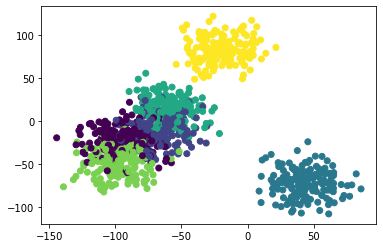

In [6]:
n_samples = 1000
n_components = 6

X, y_true = make_blobs(n_samples=n_samples,
                       center_box=(-100.0, 100.0),
                       centers=n_components,
                       cluster_std=15, )
                       #random_state=40)
X = X[:, ::-1]
plot_clusters(X, y_true)

In [7]:
km = kmean(X, 6, 20, 1, 0.001)
km.predict()

[INFO]: Iter 1 / 20
[INFO]: Error 192.31765669972495
[INFO]: Iter 2 / 20
[INFO]: Error 83.11838012700547
[INFO]: Iter 3 / 20
[INFO]: Error 28.603547084815304
[INFO]: Iter 4 / 20
[INFO]: Error 6.728466122600126
[INFO]: Iter 5 / 20
[INFO]: Error 4.787427703890207
[INFO]: Iter 6 / 20
[INFO]: Error 3.1635381953727935
[INFO]: Iter 7 / 20
[INFO]: Error 3.1591104066204982
[INFO]: Iter 8 / 20
[INFO]: Error 2.9890052601436143
[INFO]: Iter 9 / 20
[INFO]: Error 1.7990703371801917
[INFO]: Iter 10 / 20
[INFO]: Error 1.72533463065566
[INFO]: Iter 11 / 20
[INFO]: Error 2.4475908248055274
[INFO]: Iter 12 / 20
[INFO]: Error 2.8949783460273255
[INFO]: Iter 13 / 20
[INFO]: Error 2.5491243551655014
[INFO]: Iter 14 / 20
[INFO]: Error 1.824101942775568
[INFO]: Iter 15 / 20
[INFO]: Error 0.8367121621898271
[INFO]: Iter 16 / 20
[INFO]: Error 0.616398204192627
[INFO]: Iter 17 / 20
[INFO]: Error 0.3956710759387691
[INFO]: Iter 18 / 20
[INFO]: Error 0.22666129498354998
[INFO]: Iter 19 / 20
[INFO]: Error 0.0


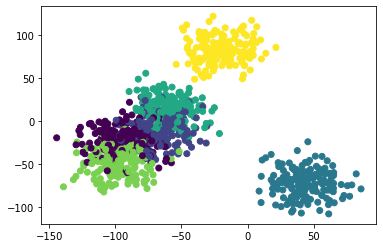

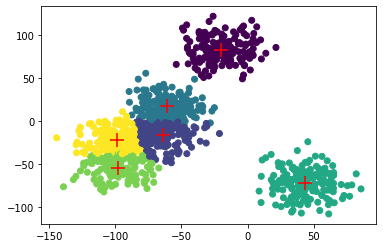

In [10]:
plot_clusters(X, y_true)
plot_clusters(X, km.y_pred, km.C0)

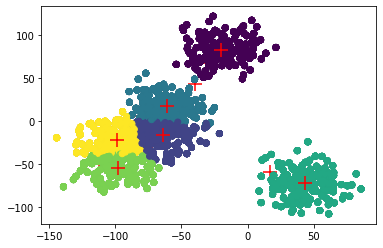

In [11]:
plot_clusters_history(X, km.y_history, km.C_history, True)

In [12]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage.transform import rescale, resize, downscale_local_mean

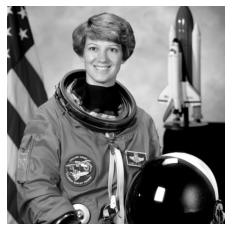

In [13]:
img = skimage.img_as_float(skid.astronaut())*255.0
gray_img = skic.rgb2gray(img)

plt.imshow(np.uint8(gray_img), cmap='gray')
plt.axis('off')
plt.show()

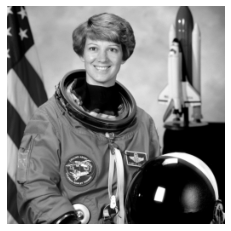

(256, 256)

In [14]:
# resize image
image_resized = resize(gray_img, (gray_img.shape[0] // 2, gray_img.shape[1] // 2),
                       anti_aliasing=True)

plt.imshow(np.uint8(image_resized), cmap='gray')
plt.axis('off')
plt.show()
image_resized.shape

In [15]:
X_gray_img = image_resized.reshape((-1, 1))   
X_gray_img.shape

(65536, 1)

In [16]:
k = 2
km2 = kmean(X_gray_img, k, 10, 10, 1)
km2.predict()

[INFO]: Iter 1 / 10
[INFO]: Error 53.81216223961158
[INFO]: Iter 2 / 10
[INFO]: Error 18.258699457946616
[INFO]: Iter 3 / 10
[INFO]: Error 6.39942013421059
[INFO]: Iter 4 / 10
[INFO]: Error 2.4360322698794086
[INFO]: Iter 5 / 10
[INFO]: Error 0.9696937065114462


In [17]:
img_out = np.array([km2.C0[int(c)] for c in km2.y_pred])
img_out = img_out.reshape(image_resized.shape)
img_out.shape

(256, 256)

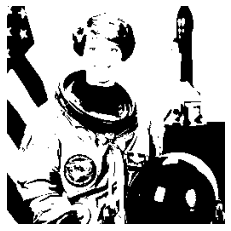

In [18]:
plt.imshow(np.uint8(img_out), cmap='gray')
plt.axis('off')
plt.show()

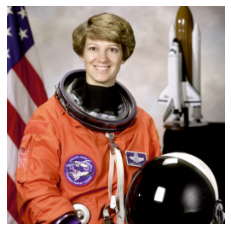

(256, 256, 3)

In [19]:
# resize image
image_resized_color = resize(img, (img.shape[0] // 2, img.shape[1] // 2),
                       anti_aliasing=True)

plt.imshow(np.uint8(image_resized_color))
plt.axis('off')
plt.show()
image_resized_color.shape

In [20]:
R = image_resized_color[:,:,0]
G = image_resized_color[:,:,1]
B = image_resized_color[:,:,2]

XR = R.reshape((-1, 1))  
XG = G.reshape((-1, 1)) 
XB = B.reshape((-1, 1)) 

X_color_img = np.concatenate((XR,XG,XB),axis=1) 
X_color_img.shape

(65536, 3)

In [21]:
k = 4
iter = 20
km3 = kmean(X_color_img, k, iter, 10, 1)
km3.predict()

[INFO]: Iter 1 / 20
[INFO]: Error 168.64039765235523
[INFO]: Iter 2 / 20
[INFO]: Error 50.87845121282453
[INFO]: Iter 3 / 20
[INFO]: Error 23.028151074661427
[INFO]: Iter 4 / 20
[INFO]: Error 12.948970543872326
[INFO]: Iter 5 / 20
[INFO]: Error 8.98183829670009
[INFO]: Iter 6 / 20
[INFO]: Error 8.520067767843113
[INFO]: Iter 7 / 20
[INFO]: Error 9.941652578753125
[INFO]: Iter 8 / 20
[INFO]: Error 10.107332617025092
[INFO]: Iter 9 / 20
[INFO]: Error 10.305670655160991
[INFO]: Iter 10 / 20
[INFO]: Error 11.048064210345796
[INFO]: Iter 11 / 20
[INFO]: Error 11.233173856753325
[INFO]: Iter 12 / 20
[INFO]: Error 11.241661588384034
[INFO]: Iter 13 / 20
[INFO]: Error 9.101952779059149
[INFO]: Iter 14 / 20
[INFO]: Error 6.792058454622971
[INFO]: Iter 15 / 20
[INFO]: Error 5.530817848667252
[INFO]: Iter 16 / 20
[INFO]: Error 4.177781774005578
[INFO]: Iter 17 / 20
[INFO]: Error 2.7660507867342896
[INFO]: Iter 18 / 20
[INFO]: Error 1.7925489498526936
[INFO]: Iter 19 / 20
[INFO]: Error 1.179159148

In [22]:
out_tmp = np.array([km3.C0[int(c)] for c in km3.y_pred])
img_out_color = out_tmp.reshape(image_resized_color.shape)

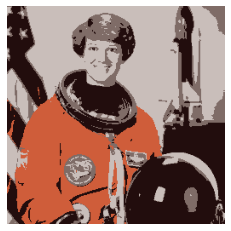

In [23]:
plt.imshow(np.uint8(img_out_color))
plt.axis('off')
plt.show()

In [24]:
k = 4
iter = 20
km3a = kmean(XR, k, iter, 10, 1)
km3a.predict()

[INFO]: Iter 1 / 20
[INFO]: Error 28.64204808251939
[INFO]: Iter 2 / 20
[INFO]: Error 24.472833584735312
[INFO]: Iter 3 / 20
[INFO]: Error 21.856298557701685
[INFO]: Iter 4 / 20
[INFO]: Error 19.461173840641067
[INFO]: Iter 5 / 20
[INFO]: Error 15.30733144170128
[INFO]: Iter 6 / 20
[INFO]: Error 11.137389432753709
[INFO]: Iter 7 / 20
[INFO]: Error 8.05589480458706
[INFO]: Iter 8 / 20
[INFO]: Error 6.027124896347939
[INFO]: Iter 9 / 20
[INFO]: Error 5.049834157035852
[INFO]: Iter 10 / 20
[INFO]: Error 4.321430758825283
[INFO]: Iter 11 / 20
[INFO]: Error 3.1978650047298824
[INFO]: Iter 12 / 20
[INFO]: Error 2.4788732263800046
[INFO]: Iter 13 / 20
[INFO]: Error 1.7457414475123567
[INFO]: Iter 14 / 20
[INFO]: Error 1.372381441440547
[INFO]: Iter 15 / 20
[INFO]: Error 1.0487564625232668
[INFO]: Iter 16 / 20
[INFO]: Error 0.7792118693143966


In [25]:
km3b = kmean(XG, k, iter, 10, 1)
km3b.predict()

[INFO]: Iter 1 / 20
[INFO]: Error 85.66859014317302
[INFO]: Iter 2 / 20
[INFO]: Error 16.816455961184317
[INFO]: Iter 3 / 20
[INFO]: Error 7.146678445892778
[INFO]: Iter 4 / 20
[INFO]: Error 4.504055866305835
[INFO]: Iter 5 / 20
[INFO]: Error 3.2182342844476732
[INFO]: Iter 6 / 20
[INFO]: Error 2.515670686344876
[INFO]: Iter 7 / 20
[INFO]: Error 2.005226535771259
[INFO]: Iter 8 / 20
[INFO]: Error 1.7146940403223905
[INFO]: Iter 9 / 20
[INFO]: Error 1.328381365127827
[INFO]: Iter 10 / 20
[INFO]: Error 1.1413397930552556
[INFO]: Iter 11 / 20
[INFO]: Error 1.0690568630370105
[INFO]: Iter 12 / 20
[INFO]: Error 0.9163086651494918


In [26]:
km3c = kmean(XB, k, iter, 10, 1)
km3c.predict()

[INFO]: Iter 1 / 20
[INFO]: Error 33.22789102257697
[INFO]: Iter 2 / 20
[INFO]: Error 8.25422200018153
[INFO]: Iter 3 / 20
[INFO]: Error 3.967113162727278
[INFO]: Iter 4 / 20
[INFO]: Error 2.115199927710405
[INFO]: Iter 5 / 20
[INFO]: Error 1.3785219625975618
[INFO]: Iter 6 / 20
[INFO]: Error 1.1502443528030284
[INFO]: Iter 7 / 20
[INFO]: Error 0.9616407935119984


In [27]:
out_tmp1 = np.array([km3a.C0[int(c)] for c in km3a.y_pred])
out_tmp1 = out_tmp1.reshape(image_resized_color.shape[:-1])

out_tmp2 = np.array([km3b.C0[int(c)] for c in km3b.y_pred])
out_tmp2 = out_tmp2.reshape(image_resized_color.shape[:-1])

out_tmp3 = np.array([km3c.C0[int(c)] for c in km3c.y_pred])
out_tmp3 = out_tmp3.reshape(image_resized_color.shape[:-1])


img_out_color2 = np.stack([out_tmp1, out_tmp2, out_tmp3], axis=-1)

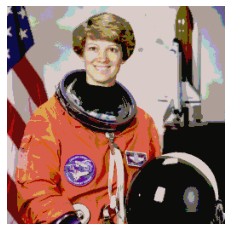

In [28]:
plt.imshow(np.uint8(img_out_color2))
plt.axis('off')
plt.show()